In [7]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
dir_name  = r"/nrs/ahrens/Takashi/01292020"

file_name_list = [r"Fish1-1",r"Fish2-1",r"Fish3-1",r"Fish4-1",r"Fish5-1",r"Fish6-1"]


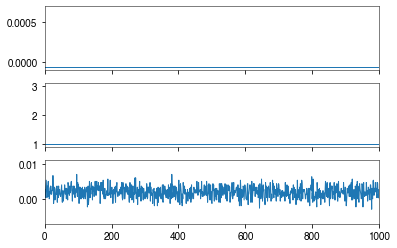

In [11]:
swimdata = np.load(dir_name + "/" + file_name_list[0] + "/swim/swimdata.npy", allow_pickle=True)[()]
rawdata  = np.load(dir_name + "/" + file_name_list[0] + "/swim/rawdata.npy",  allow_pickle=True)[()]
swims_start        = swimdata['swimStartIndT']
swims_end          = swimdata['swimEndIndT']

fig, ax =plt.subplots(3,1, sharex=True)
ax = ax.flatten()
ax[0].plot(rawdata['stimParam1'])
ax[1].plot(rawdata['stimParam3'])
ax[2].plot(rawdata['ch3'])
ax[2].set_xlim([0, 1000])
plt.show()

In [ ]:

## measure swim power change before/after replay

plt.figure(1,figsize=(8,14))
ax=[];

for f in range(len(file_name_list)):
    
    swimdata = np.load(dir_name + "/" + file_name_list[f] + "/swim/swimdata.npy", allow_pickle=True)[()]
    rawdata  = np.load(dir_name + "/" + file_name_list[f] + "/swim/rawdata.npy",  allow_pickle=True)[()]

    swims_start        = swimdata['swimStartIndT']
    swims_end          = swimdata['swimEndIndT']

    swim_episodes      = np.zeros((len(rawdata['ch1']),))

    for i in range(len(swims_start)):
        swim_episodes[swims_start[i]:swims_end[i]] = 1

    swim_pow        = np.zeros((len(swims_start),))

    for i in range(len(swims_start)):
        
        p1 = max(np.sum((swimdata['fltCh1']-swimdata['back1'])[swims_start[i]:swims_end[i]]),0)
        p2 = max(np.sum((swimdata['fltCh2']-swimdata['back2'])[swims_start[i]:swims_end[i]]),0)
        swim_pow[i] = p1+p2


    swims_type          = rawdata['stimParam3'][swims_start]
    replay_start_timing = np.where(np.diff((rawdata['stimParam3'] == 2).astype('int'))==1)[0]+1
    replay_end_timing   = np.where(np.diff((rawdata['stimParam3'] == 2).astype('int'))==1)[0]+1
    change_timing       = np.where(np.diff((rawdata['stimParam3'] == 3).astype('int'))==1)[0]+1

    swim_around_replay       = np.zeros((len(replay_start_timing),3))
    swim_around_replay_clean = np.zeros((len(replay_start_timing),))
    swimpow_around_replay    = np.zeros((len(replay_start_timing),3))


    swim_around_change = np.zeros((len(change_timing),3))
    swimpow_around_change = np.zeros((len(change_timing),3))
    swim_around_change_clean = np.zeros((len(change_timing),))

    for i in range(len(replay_start_timing)):

        swim_around_replay[i,0]     = np.where(swims_start < replay_start_timing[i])[0][-1]
        swim_around_replay[i,1]     = np.where(swims_start > (replay_start_timing[i]+3000))[0][0]
        swim_around_replay[i,2]     = swim_around_replay[i,1] + 1

        if np.sum(swim_episodes[(replay_start_timing[i]-1500):(replay_start_timing[i]+1500)])==0:
            swim_around_replay_clean[i] = 1

        swimpow_around_replay[i,0]  = swim_pow[int(swim_around_replay[i,0])]
        swimpow_around_replay[i,1]  = swim_pow[int(swim_around_replay[i,1])]
        swimpow_around_replay[i,2]  = swim_pow[int(swim_around_replay[i,2])]

        swim_around_change[i,0] = np.where(swims_start < change_timing[i])[0][-1]
        swim_around_change[i,1] = np.where(swims_start > change_timing[i])[0][0]
        swim_around_change[i,2] = swim_around_change[i,1]+1
    
    
        if np.sum(swim_episodes[(change_timing[i]-1500):(change_timing[i])])==0:
            swim_around_change_clean[i] = 1

        swimpow_around_change[i,0] = swim_pow[int(swim_around_change[i,0])]
        swimpow_around_change[i,1] = swim_pow[int(swim_around_change[i,1])]
        swimpow_around_change[i,2] = swim_pow[int(swim_around_change[i,2])]

    ax.append(plt.subplot(len(file_name_list),2,f*2+1))
    plt.plot(swimpow_around_replay[swim_around_replay_clean==1,:].T, color='k')
    plt.subplot(len(file_name_list),2,f*2+1).plot(np.median(swimpow_around_replay[swim_around_replay_clean==1,:],axis=0),color='r',linewidth=5)
    plt.subplot(len(file_name_list),2,f*2+2,sharey=ax[-1]).plot(swimpow_around_change[swim_around_change_clean==1,:].T, color='k')
    plt.subplot(len(file_name_list),2,f*2+2,sharey=ax[-1]).plot(np.median(swimpow_around_change[swim_around_change_clean==1,:],axis=0),color='r',linewidth=5)
    
plt.savefig('./fig.pdf')

In [ ]:
## measure distance swim

plt.figure(2,figsize=(8,20))
ax=[];

for f in range(len(file_name_list)):
    
    swimdata = np.load(dir_name + "/" + file_name_list[f] + "/swim/swimdata.npy", allow_pickle=True)[()]
    rawdata  = np.load(dir_name + "/" + file_name_list[f] + "/swim/rawdata.npy",  allow_pickle=True)[()]

    swims_start        = swimdata['swimStartIndT']
    swims_end          = swimdata['swimEndIndT']

    swim_episodes      = np.zeros((len(rawdata['ch1']),))

    for i in range(len(swims_start)):
        swim_episodes[swims_start[i]:swims_end[i]] = 1

    swims_type          = rawdata['stimParam3'][swims_start]
    replay_start_timing = np.where(np.diff((rawdata['stimParam3'] == 2).astype('int'))==1)[0]+1
    replay_end_timing   = np.where(np.diff((rawdata['stimParam3'] == 2).astype('int'))==1)[0]+1
    change_timing       = np.where(np.diff((rawdata['stimParam3'] == 3).astype('int'))==1)[0]+1

    swimdist_around_replay    = np.zeros((len(replay_start_timing),))
    swim_around_replay_clean = np.zeros((len(replay_start_timing),))
    
    swim_around_change = np.zeros((len(change_timing),3))
    swimdist_around_change = np.zeros((len(change_timing),3))
    swim_around_change_clean = np.zeros((len(change_timing),))

    for i in range(len(replay_start_timing)):


        if np.sum(swim_episodes[(replay_start_timing[i]-1500):(replay_start_timing[i]+1500)])==0:
            swim_around_replay_clean[i] = 1

        swimdist_around_replay[i]  = np.sum(rawdata['stimParam1'][replay_start_timing[i]:replay_start_timing[i]+3000])

        
        swim_around_change[i,0] = np.where(swims_start < change_timing[i])[0][-1]
        swim_around_change[i,1] = np.where(swims_start > change_timing[i])[0][0]
        swim_around_change[i,2] = swim_around_change[i,1]+1
    
    
        if np.sum(swim_episodes[(change_timing[i]-1500):(change_timing[i])])==0:
            swim_around_change_clean[i] = 1

        swimdist_around_change[i,0] = np.sum(rawdata['stimParam1'][int(swims_start[int(swim_around_change[i,0])]):int(swims_start[int(swim_around_change[i,0])]+3000)])
        swimdist_around_change[i,1] = np.sum(rawdata['stimParam1'][int(swims_start[int(swim_around_change[i,1])]):int(swims_start[int(swim_around_change[i,1])]+3000)])
        swimdist_around_change[i,2] = np.sum(rawdata['stimParam1'][int(swims_start[int(swim_around_change[i,2])]):int(swims_start[int(swim_around_change[i,2])]+3000)])

    ax.append(plt.subplot(len(file_name_list),2,f*2+1))
    plt.plot(np.ones((int(sum(swim_around_replay_clean)),)),swimdist_around_replay[swim_around_replay_clean==1], marker='o',color='k')
    plt.subplot(len(file_name_list),2,f*2+1).plot(1,np.median(swimdist_around_replay[swim_around_replay_clean==1],axis=0),marker='o',markersize=12, color='r',linewidth=5)
    plt.subplot(len(file_name_list),2,f*2+2,sharey=ax[-1]).plot(swimdist_around_change[swim_around_change_clean==1,:].T, color='k')
    plt.subplot(len(file_name_list),2,f*2+2,sharey=ax[-1]).plot(np.median(swimdist_around_change[swim_around_change_clean==1,:],axis=0),color='r',linewidth=5)
    
plt.savefig('./fig2.pdf')

In [ ]:
## measure swim interval change before/after replay

plt.figure(3,figsize=(8,12))
ax3=[];

for f in range(len(file_name_list)):
    
    swimdata = np.load(dir_name + "/" + file_name_list[f] + "/swim/swimdata.npy", allow_pickle=True)[()]
    rawdata  = np.load(dir_name + "/" + file_name_list[f] + "/swim/rawdata.npy",  allow_pickle=True)[()]

    swims_start        = swimdata['swimStartIndT']
    swims_end          = swimdata['swimEndIndT']

    swim_episodes      = np.zeros((len(rawdata['ch1']),))

    for i in range(len(swims_start)):
        swim_episodes[swims_start[i]:swims_end[i]] = 1


    swims_type          = rawdata['stimParam3'][swims_start]
    replay_start_timing = np.where(np.diff((rawdata['stimParam3'] == 2).astype('int'))==1)[0]+1
    replay_end_timing   = np.where(np.diff((rawdata['stimParam3'] == 2).astype('int'))==1)[0]+1
    change_timing       = np.where(np.diff((rawdata['stimParam3'] == 3).astype('int'))==1)[0]+1

    swim_around_replay       = np.zeros((len(replay_start_timing),3))
    swim_around_replay_clean = np.zeros((len(replay_start_timing),))
    swimint_around_replay    = np.zeros((len(replay_start_timing),3))


    swim_around_change = np.zeros((len(change_timing),3))
    swimint_around_change = np.zeros((len(change_timing),3))
    swim_around_change_clean = np.zeros((len(change_timing),))

    for i in range(len(replay_start_timing)):

        swim_around_replay[i,0]     = np.where(swims_start < replay_start_timing[i])[0][-1]
        swim_around_replay[i,1]     = np.where(swims_start > (replay_start_timing[i]+3000))[0][0]
        swim_around_replay[i,2]     = swim_around_replay[i,1] + 1

        if np.sum(swim_episodes[(replay_start_timing[i]-1500):(replay_start_timing[i]+1500)])==0:
            swim_around_replay_clean[i] = 1

        swimint_around_replay[i,0]  = (swims_start[int(swim_around_replay[i,0])]-swims_end[int(swim_around_replay[i,0])-1])/6000
        swimint_around_replay[i,1]  = (swims_start[int(swim_around_replay[i,1])]-replay_start_timing[i]-3000)/6000
        swimint_around_replay[i,2]  = (swims_start[int(swim_around_replay[i,2])]-swims_end[int(swim_around_replay[i,1])])/6000

        swim_around_change[i,0] = np.where(swims_start < change_timing[i])[0][-1]
        swim_around_change[i,1] = np.where(swims_start > change_timing[i])[0][0]
        swim_around_change[i,2] = swim_around_change[i,1]+1
    
    
        if np.sum(swim_episodes[(change_timing[i]-1500):(change_timing[i])])==0:
            swim_around_change_clean[i] = 1

        swimint_around_change[i,0] = (swims_start[int(swim_around_change[i,0])]-swims_end[int(swim_around_change[i,0])-1])/6000
        swimint_around_change[i,1] = (swims_start[int(swim_around_change[i,1])]-swims_end[int(swim_around_change[i,0])])/6000
        swimint_around_change[i,2] = (swims_start[int(swim_around_change[i,2])]-swims_end[int(swim_around_change[i,1])])/6000

    ax3.append(plt.subplot(len(file_name_list),2,f*2+1))
    plt.plot(swimint_around_replay[swim_around_replay_clean==1,:].T, color='k')
    plt.subplot(len(file_name_list),2,f*2+1).plot(np.median(swimint_around_replay[swim_around_replay_clean==1,:],axis=0),color='r',linewidth=5)
    plt.subplot(len(file_name_list),2,f*2+2,sharey=ax3[-1]).plot(swimint_around_change[swim_around_change_clean==1,:].T, color='k')
    plt.subplot(len(file_name_list),2,f*2+2,sharey=ax3[-1]).plot(np.median(swimint_around_change[swim_around_change_clean==1,:],axis=0),color='r',linewidth=5)
    
plt.savefig('./fig3.pdf')